In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
x_data = data.iloc[:,0:data.shape[1]-1]
y_data = data.iloc[:,data.shape[1]-1:]
data = data.drop(["quality"],axis=1)

In [18]:
y_data

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


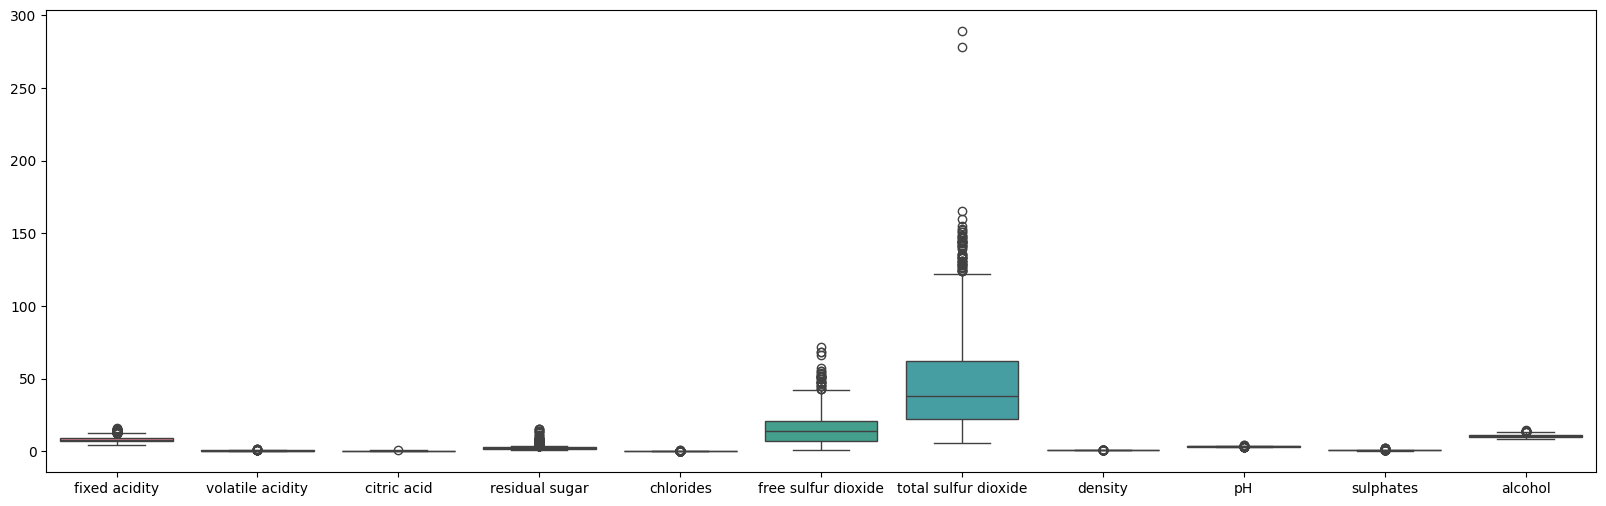

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=data)
plt.show()

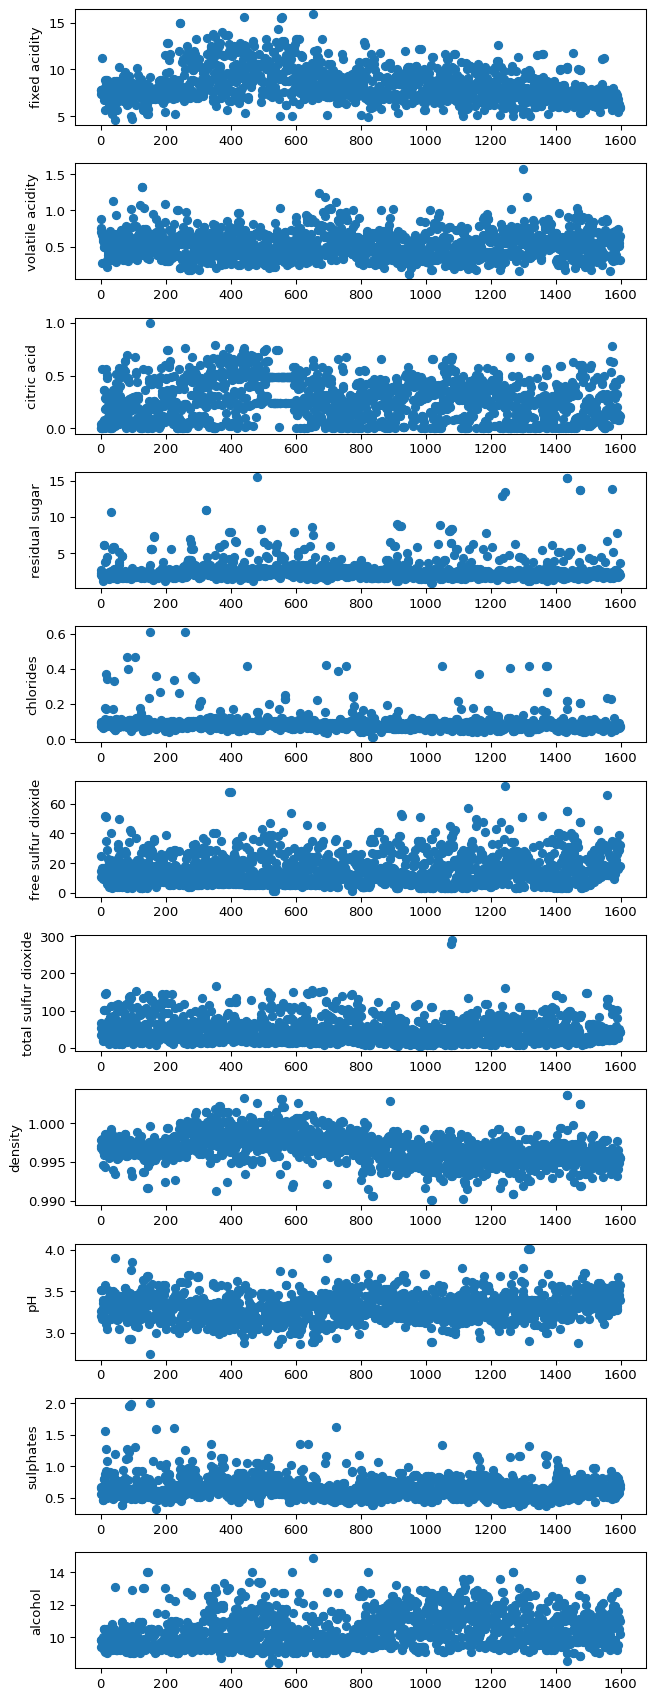

In [ ]:
fig, ax = plt.subplots(len(data.columns), 1, figsize=(7,18), dpi=95)
for i, col in enumerate(data.columns):
    ax[i].scatter(range(len(data)), data[col])
    ax[i].set_ylabel(col)
plt.tight_layout()
plt.show()

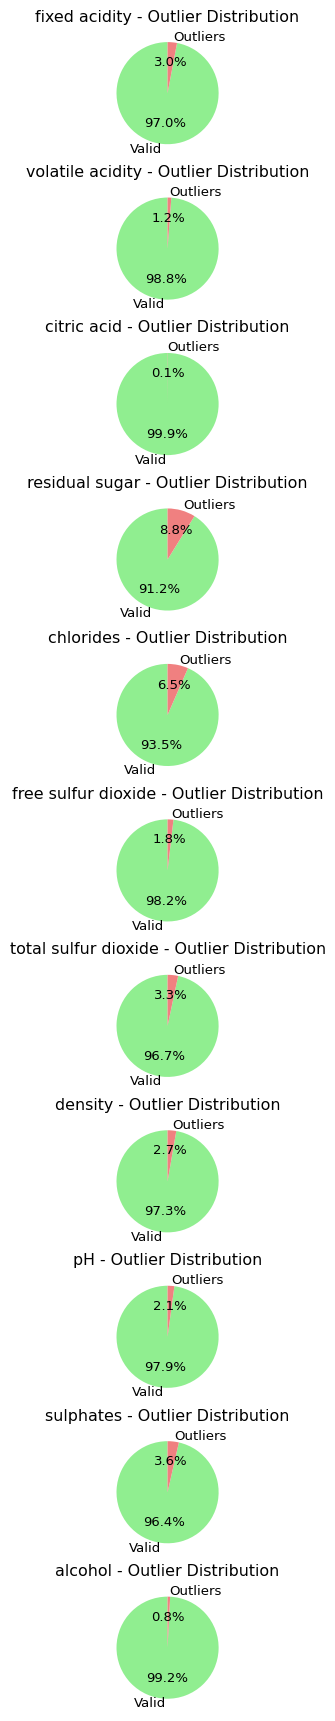

In [51]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

iqr_data_outliers = ((data<Q1-1.5*IQR) | (data>Q3+1.5*IQR))# oulier data
iqr_data_valid = ((data>Q1-1.5*IQR) | (data<Q3+1.5*IQR))

fig, ax = plt.subplots(len(data.columns), 1, figsize=(7, 18), dpi=95,layout='constrained')

for i, col in enumerate(data.columns):
    # Count outliers and valid points
    outlier_count = iqr_data_outliers[col].sum()
    valid_count = iqr_data_valid[col].sum()
    
    # Create pie chart
    sizes = [valid_count, outlier_count]
    labels = ['Valid', 'Outliers']
    colors = ['lightgreen', 'lightcoral']
    
    ax[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(f'{col} - Outlier Distribution')

plt.show()


In [55]:
data = data[iqr_data_valid]
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [62]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[data.columns] =scaler.fit_transform(data[data.columns])
scaled_data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [66]:
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Green', 'Blue', 'Red', 'Red'],
    'Size': ['S', 'M', 'L', 'L', 'M', 'S', 'S', 'M', 'L', 'M'],
    'Price': [10, 15, 20, 10, 15, 20, 15, 10, 20, 10]
}
df = pd.DataFrame(data)
df.dtypes

Color    object
Size     object
Price     int64
dtype: object

In [85]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

encode = OneHotEncoder(sparse_output=False)
features = ['Color','Size']
final_data = df.copy()
color_enc =encode.fit_transform(df[features])
encoded_df = pd.DataFrame(color_enc,columns=encode.get_feature_names_out(features))
final_df = pd.concat([encoded_df,df['Price']],axis=1)
final_df


,Color_Blue,Color_Green,Color_Red,Size_L,Size_M,Size_S,Price
0,0.0,0.0,1.0,0.0,0.0,1.0,10
1,1.0,0.0,0.0,0.0,1.0,0.0,15
2,0.0,1.0,0.0,1.0,0.0,0.0,20
3,1.0,0.0,0.0,1.0,0.0,0.0,10
4,0.0,0.0,1.0,0.0,1.0,0.0,15
5,0.0,1.0,0.0,0.0,0.0,1.0,20
6,0.0,1.0,0.0,0.0,0.0,1.0,15
7,1.0,0.0,0.0,0.0,1.0,0.0,10
8,0.0,0.0,1.0,1.0,0.0,0.0,20
9,0.0,0.0,1.0,0.0,1.0,0.0,10


In [1]:
import string 
text = "The quick brown fox jumps over the lazy dog. The dogs are barking loudly in the yard jedge."
text= text.lower() # lowercasting the text 
text = text.translate(str.maketrans('', '', string.punctuation))
text

'the quick brown fox jumps over the lazy dog the dogs are barking loudly in the yard jedge'

In [2]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
unique = word_tokenize(text)

[nltk_data] Downloading package punkt to /home/rak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/rak/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
unique

['the',
 'quick',
 'brown',
 'fox',
 'jumps',
 'over',
 'the',
 'lazy',
 'dog',
 'the',
 'dogs',
 'are',
 'barking',
 'loudly',
 'in',
 'the',
 'yard',
 'jedge']

In [4]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in unique if word not in stop_words]
filtered_tokens


['quick',
 'brown',
 'fox',
 'jumps',
 'lazy',
 'dog',
 'dogs',
 'barking',
 'loudly',
 'yard',
 'jedge']

In [6]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed = list(set(stemmer.stem(word) for word in filtered_tokens))
stemmed

['yard',
 'brown',
 'bark',
 'lazi',
 'jedg',
 'quick',
 'jump',
 'loudli',
 'fox',
 'dog']

In [7]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lemmed = [lem.lemmatize(word) for word in stemmed]
lemmed

['yard',
 'brown',
 'bark',
 'lazi',
 'jedg',
 'quick',
 'jump',
 'loudli',
 'fox',
 'dog']

In [12]:
from textblob import TextBlob
text = list(str(TextBlob(w).correct()) for w in lemmed)
text

['yard',
 'brown',
 'bark',
 'lazy',
 'red',
 'quick',
 'jump',
 'loudly',
 'fox',
 'dog']

In [ ]:
feture_data = {
    'height' :[170,160,180,175,165],
    'weight' :[70,60,80,75,65]
}
dfs = pd.DataFrame(feture_data)
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=2,include_bias=False)
polished_data = pd.DataFrame(poly_model.fit_transform(dfs.iloc[:,:]),columns=poly_model.get_feature_names_out(dfs.columns))
polished_data

,height,weight,height^2,height weight,weight^2
0,170.0,70.0,28900.0,11900.0,4900.0
1,160.0,60.0,25600.0,9600.0,3600.0
2,180.0,80.0,32400.0,14400.0,6400.0
3,175.0,75.0,30625.0,13125.0,5625.0
4,165.0,65.0,27225.0,10725.0,4225.0


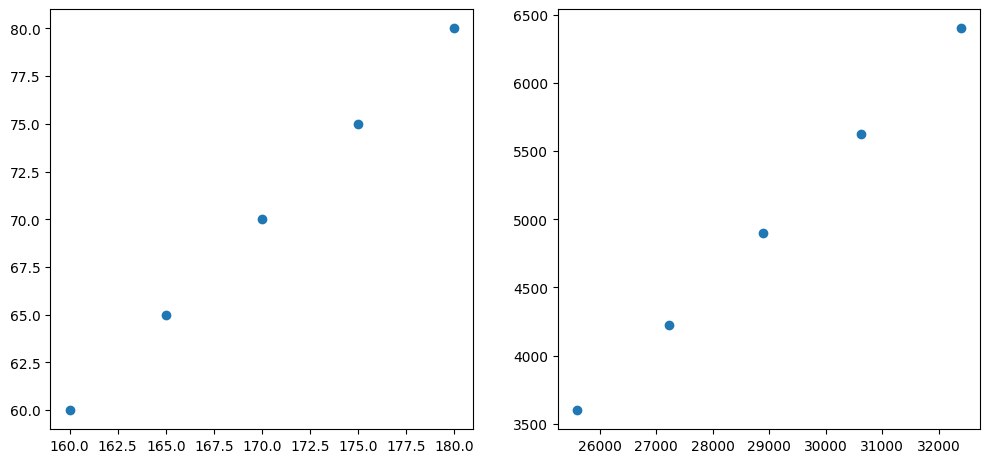

In [29]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.scatter(x='height',y='weight',data=polished_data)
plt.subplot(2,2,2)
plt.scatter(x='height^2',y='weight^2',data=polished_data)
plt.show()

In [33]:
polished_data['heigth+weight'] = polished_data['height']+polished_data['weight']
polished_data['height mean'] = polished_data['height'].mean()
polished_data['weight mean'] = polished_data['weight'].mean()
polished_data['height_bin'] = pd.cut(polished_data['height'],bins =[150,165,175,185],labels = ['short','Medium','tall'])
polished_data

,height,weight,height^2,height weight,weight^2,heigth+weight,height mean,weight mean,height_bin
0,170.0,70.0,28900.0,11900.0,4900.0,240.0,170.0,70.0,Medium
1,160.0,60.0,25600.0,9600.0,3600.0,220.0,170.0,70.0,short
2,180.0,80.0,32400.0,14400.0,6400.0,260.0,170.0,70.0,tall
3,175.0,75.0,30625.0,13125.0,5625.0,250.0,170.0,70.0,Medium
4,165.0,65.0,27225.0,10725.0,4225.0,230.0,170.0,70.0,short


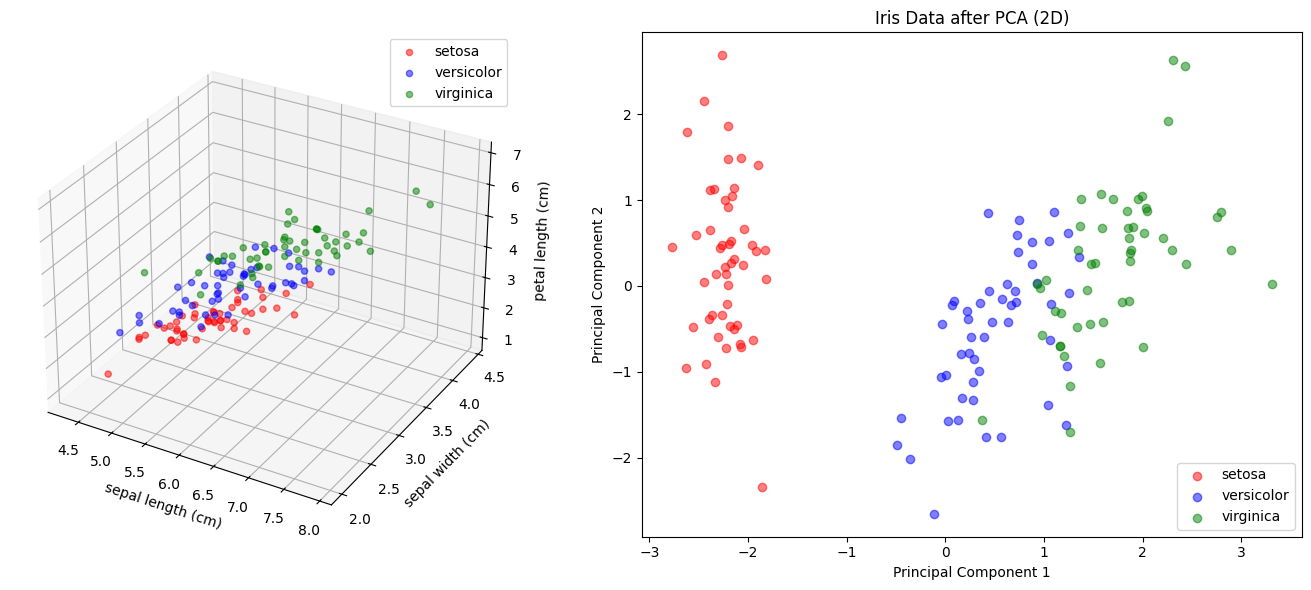

In [55]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
x_data = iris.data
y_data = iris.target
x_features = iris.feature_names
y_features = iris.target_names

scaler  = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

fig = plt.figure(figsize =(14,6))
ax = fig.add_subplot(121,projection='3d')
for target,color,label in zip(np.unique(y_data),['r','b','g'],y_features):
    ax.scatter(x_data[y_data == target, 0], x_data[y_data==target, 1], x_data[y_data ==target, 2], color=color, label=label, alpha=0.5)
ax.set_xlabel(x_features[0])
ax.set_ylabel(x_features[1])
ax.set_zlabel(x_features[2])
ax.legend()

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

ax1 = fig.add_subplot(122)
for target ,color,label in zip(np.unique(y_data),['r','b','g'],y_features):
    ax1.scatter(x_pca[y_data == target,0],x_pca[y_data==target, 1], color=color, label=label, alpha=0.5)
plt.title('Iris Data after PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()
